In [71]:
import pickle
from sklearn.datasets import load_svmlight_file, load_svmlight_files
from sklearn.neighbors import NearestCentroid
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn
from sklearn import svm
import numpy
import pandas as pd
import jsonlines
from matplotlib_venn import  venn2, venn2_circles, venn2_unweighted,  venn3, venn3_unweighted, venn3_circles


from matplotlib import pyplot as plt


SEED = 42
dataset = "aisopos_ntua_2L"
index_fold = 0

In [24]:
path = "../combinacao_atencao/"
ids = pickle.load( open(f'{path}dataset/{dataset}/splits/split_10_with_val.pkl', 'rb') )
x_train_tfidf, y_train, x_val_tfidf, y_val, x_test_tfidf, y_test = load_svmlight_files([open(f'{path}kaggle_tfidf/{dataset}_tfidf_train{index_fold}', 'rb'), open(f'{path}kaggle_tfidf/{dataset}_tfidf_val{index_fold}', 'rb'), open(f'{path}kaggle_tfidf/{dataset}_tfidf_test{index_fold}', 'rb')])

#estimator = RandomForestClassifier(random_state=SEED)
#estimator = LogisticRegression(solver='liblinear')

#estimator = GridSearchCV(estimator, [{'C':  [0.01, 0.1, 1, 10]}], cv=5, scoring='f1_macro', n_jobs=-1)
#estimator = NearestCentroid()

y_pred_tfidf = classifica(x_train_tfidf, y_train, x_test_tfidf)

path = "../fasttext/"
nome_experimento= f'{path}{dataset}_fasttext' 
webkb = jsonlines.open(f'{nome_experimento}.json')
docs = []
for line in webkb:
    docs.append( (line['id'], line['fasttext'], line['label']) )    
    
X = pd.DataFrame(docs, columns=['id', 'fasttext', 'label'])
x_train = X.query(f"id == {ids['train_idxs'][index_fold]}")
x_val = X.query(f"id == {ids['val_idxs'][index_fold]}")
x_test = X.query(f"id == {ids['test_idxs'][index_fold]}")

y_pred_fasttext = classifica(list(x_train['fasttext']), list(x_train['label']), list(x_test['fasttext']))

#print(f"Macro-f1: { sklearn.metrics.f1_score( y_test, y_pred, average='macro')}" )
#print(f"Micro-f1: { sklearn.metrics.f1_score( y_test, y_pred, average='micro')}" )
#macro_lista.append(sklearn.metrics.f1_score( y_test, y_pred, average='macro'))

<class 'set'>
acertos_tfidf: {3, 4, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 24, 25, 26, 27}
acertos_fasttext: {10, 11, 14, 16, 17, 18, 19, 21, 24, 25, 26, 27}
8
Nenhum acertou: 8


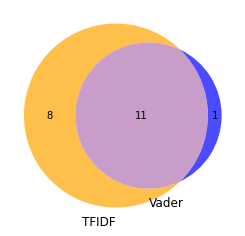

In [96]:
acertos_tfidf = y_test == y_pred_tfidf
acertos_tfidf = set( numpy.where(acertos_tfidf == True)[0] )
acertos_fasttext = y_test == y_pred_fasttext
acertos_fasttext = set( numpy.where(acertos_fasttext == True)[0] )
#acertos_fasttext = set(list(acertos_fasttext))


print( type(acertos_fasttext) )

print(f'acertos_tfidf: {acertos_tfidf}')
print(f'acertos_fasttext: {acertos_fasttext}')

A = acertos_tfidf; B = acertos_fasttext
apenas_A = A.difference(B) 
apenas_B = B.difference(A) 
osDois = A.intersection(B) 

nenhum = len(y_test) - len(A.union(B))

print(len(apenas_A))


venn2(subsets = (len(apenas_A), len(apenas_B), len(osDois)), set_labels = ('TFIDF', 'Vader'), set_colors=("orange", "blue"),alpha=0.7)
print(f'Nenhum acertou: {nenhum}')

#venn2(subsets = (10, 0, 0), set_labels = ('TFIDF', 'Vader'), set_colors=("orange", "blue"),alpha=0.7)



# A B AB C AC CB ABC
#venn3_unweighted(subsets=(len(apenas_A), len(apenas_B), len(osDois), 10, 0, 0, 0), 
#      set_labels=('Group A', 'Group B', 'Group C'), 
#      set_colors=("orange", "blue", "red"), alpha=0.7)
  

